## Analisis de datos_Mall center


### Juan David Sanabria

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  

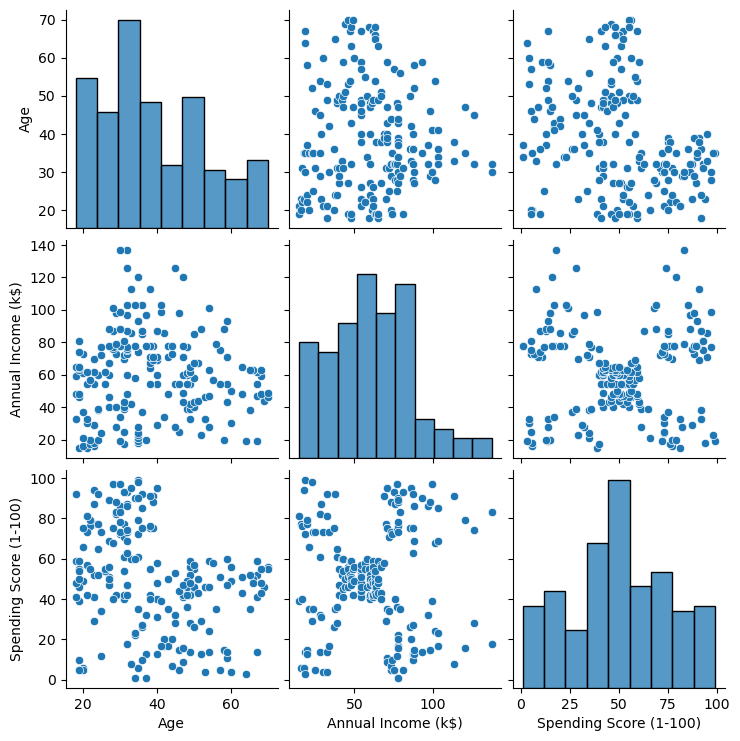

C:\Users\jdsan\Downloads\Anacondaa\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Score (K-means): 0.40846873777345605
Calinski-Harabasz Score (K-means): 123.41870976849417


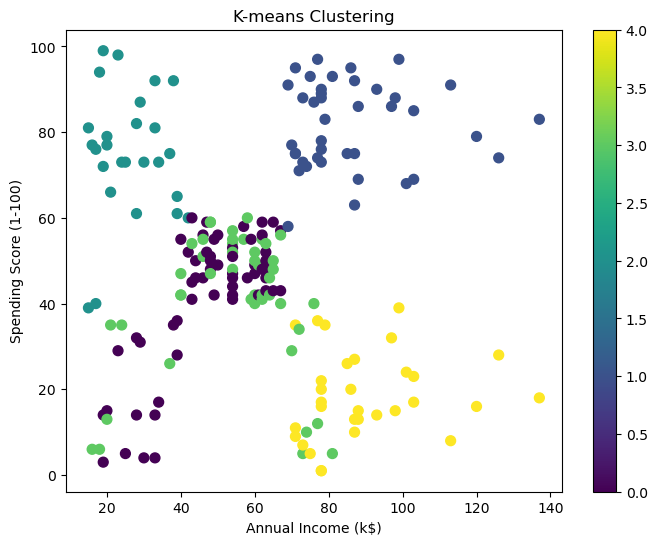

Silhouette Score (Hierarchical): 0.39002826186267214
Calinski-Harabasz Score (Hierarchical): 107.82656032570374


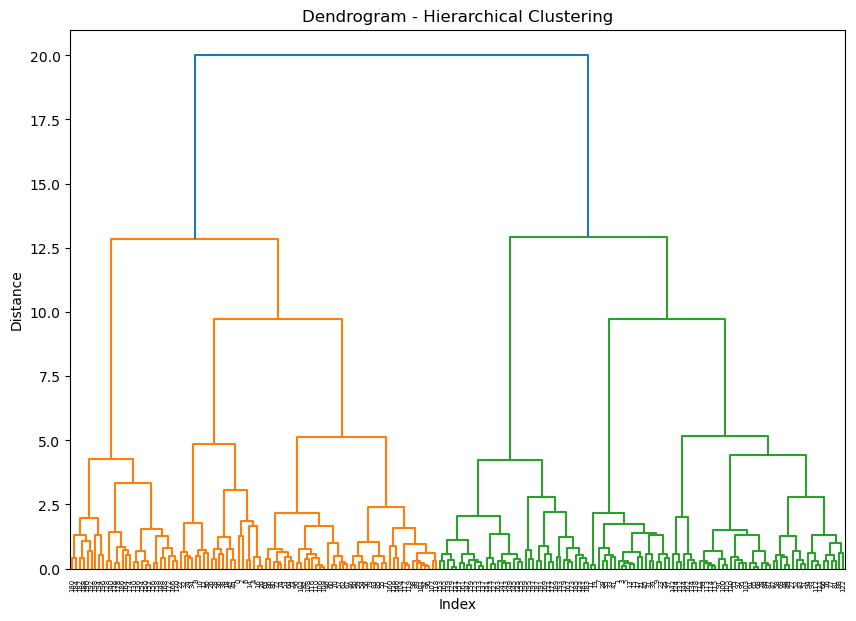

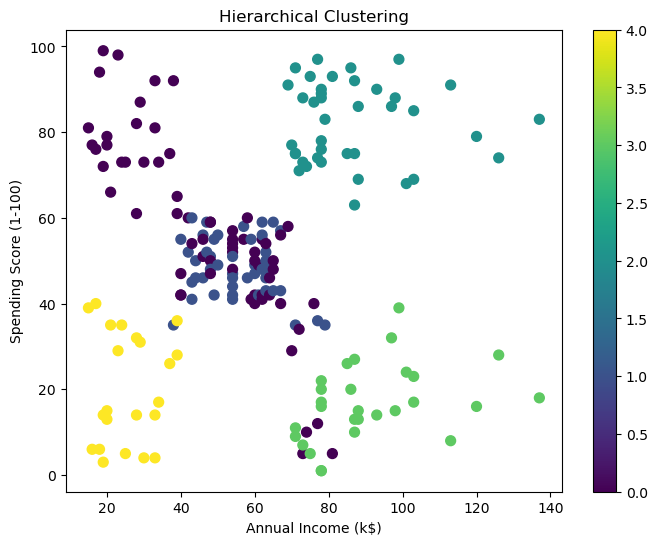

Cluster Analysis using K-means and Hierarchical Clustering:
K-means Silhouette Score: 0.40846873777345605
K-means Calinski-Harabasz Score: 123.41870976849417
Hierarchical Silhouette Score: 0.39002826186267214
Hierarchical Calinski-Harabasz Score: 107.82656032570374


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# 1. Cargar el dataset
df = pd.read_csv('Mall_Customers.csv')

# 2. Análisis exploratorio de los datos
print(df.head())          # Primeras filas del dataset
print(df.info())          # Información sobre los datos (tipos de variables, valores nulos)
print(df.describe())      # Estadísticas descriptivas
print(df.isnull().sum())  # Verificación de valores faltantes

# Visualización de la distribución de las variables
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()

# 3. Preprocesamiento de los datos
# Convertir la variable 'Gender' en numérica (Male = 0, Female = 1)
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Normalizar las características para que K-means funcione correctamente
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

# 4. K-means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(scaled_data)

# Evaluación del modelo K-means
silhouette_kmeans = silhouette_score(scaled_data, df['KMeans_Cluster'])
calinski_kmeans = calinski_harabasz_score(scaled_data, df['KMeans_Cluster'])

print(f"Silhouette Score (K-means): {silhouette_kmeans}")
print(f"Calinski-Harabasz Score (K-means): {calinski_kmeans}")

# Gráfico de los clusters de K-means
plt.figure(figsize=(8,6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['KMeans_Cluster'], cmap='viridis', s=50)
plt.title('K-means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.colorbar()
plt.show()

# 5. Clustering Jerárquico (Agglomerative)
hierarchical = AgglomerativeClustering(n_clusters=5)
df['Hierarchical_Cluster'] = hierarchical.fit_predict(scaled_data)

# Evaluación del modelo Jerárquico
silhouette_hierarchical = silhouette_score(scaled_data, df['Hierarchical_Cluster'])
calinski_hierarchical = calinski_harabasz_score(scaled_data, df['Hierarchical_Cluster'])

print(f"Silhouette Score (Hierarchical): {silhouette_hierarchical}")
print(f"Calinski-Harabasz Score (Hierarchical): {calinski_hierarchical}")

# Dendrograma para Clustering Jerárquico
plt.figure(figsize=(10, 7))
Z = linkage(scaled_data, method='ward')
dendrogram(Z)
plt.title('Dendrogram - Hierarchical Clustering')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

# Gráfico de los clusters jerárquicos
plt.figure(figsize=(8,6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Hierarchical_Cluster'], cmap='viridis', s=50)
plt.title('Hierarchical Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.colorbar()
plt.show()

# 6. Resultados finales
print(f"Cluster Analysis using K-means and Hierarchical Clustering:")
print(f"K-means Silhouette Score: {silhouette_kmeans}")
print(f"K-means Calinski-Harabasz Score: {calinski_kmeans}")
print(f"Hierarchical Silhouette Score: {silhouette_hierarchical}")
print(f"Hierarchical Calinski-Harabasz Score: {calinski_hierarchical}")

# 7. Interpretación
# Los coeficientes de Silhouette y Calinski-Harabasz ayudan a evaluar la calidad de los clusters. 
# Valores más altos indican una mejor segmentación.


